In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import History 
from keras import regularizers

In [2]:
#Loading dataset.
df = pd.read_csv('bank-additional-full.csv')

In [3]:
#Let's look at first 10 data-points
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Check the data type of each attribute
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#Check for null values
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

## Insight: age,job,marital,education,default,housing,loan,contact are the personal details of an employe
## contact,month,day_of_week,duration are campaign attributes
## Others include previous, poutcome, etc

### From the description of dataset, we had a description that duration can influence the outcome. Let's see if that's true

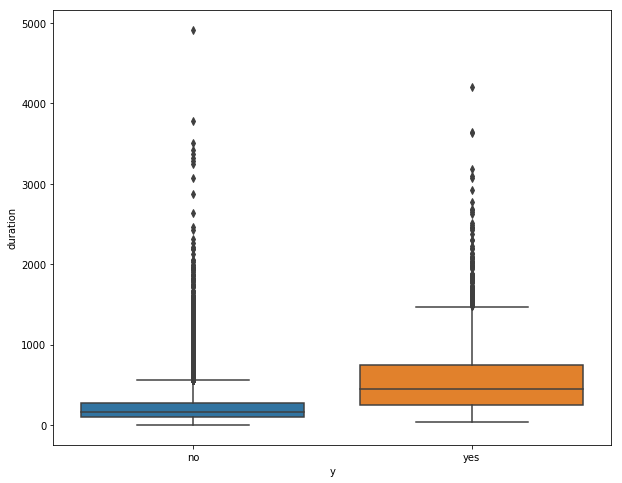

In [7]:
plt.subplots(figsize=(10,8))
sns.boxplot(df['y'],df['duration'])

## Interesting, duration do influence the client to subscribe for the term deposit 

### Let's see how different age people influence the subscription

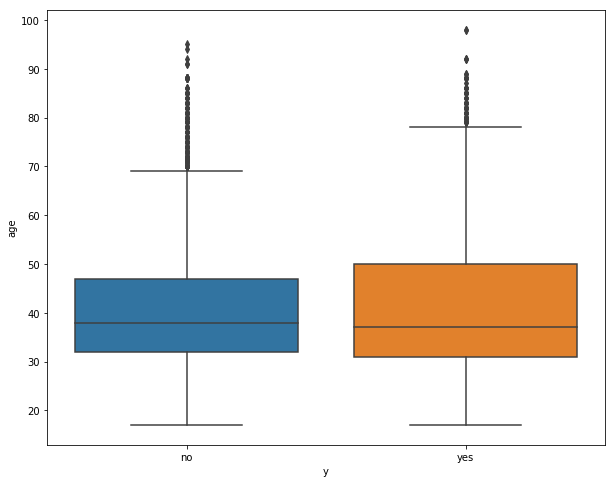

In [8]:
plt.subplots(figsize=(10,8))
sns.boxplot(df['y'],df['age'])

## Age doesn't make much difference

In [9]:
## Let's see what marital status shows
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

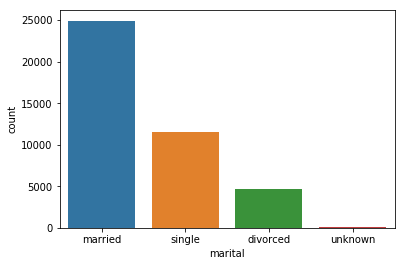

In [10]:
sns.countplot(df['marital'])

In [11]:
#It's observed that there are80 employees with unknown marriage status.
#Comparing the married status, let's replace unknown with married and see how it influences output
df = df.replace({"marital":{"unknown":"married"}})

In [12]:
df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

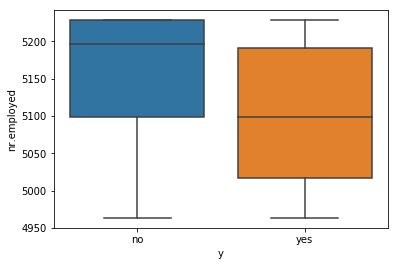

In [13]:
# Let's see if number of emplyee makes any difference in output
sns.boxplot(df['y'],df['nr.employed'])

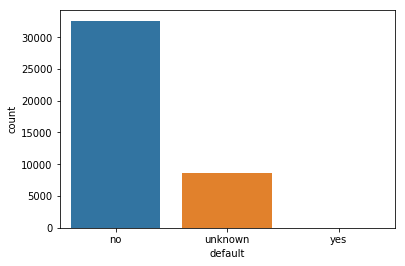

In [14]:
sns.countplot(df['default'])

## Let's look at unique values in different columns. And view their count

In [15]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [20]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [21]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [22]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

## Clean-ups
-  Looking at unique values and count,let's clean up our dataset and convert some categorical data into binary value

In [23]:
clean_ups = {"education":{"unknown":"university.degree "},
             "job":{"unknown":"admin."},
             "housing":{"unknown":1,"yes":1,"no":0},
            "contact":{"cellular":1,"telephone":0},
            "loan":{"unknown":0,"yes":1,"no":0},
             "y":{"yes":1,"no":0}
             
            }

In [24]:
df.replace(clean_ups,inplace=True)

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Time for changing the categorical data into one-hot encoded form.
### job,marital,education,month,day_of_week,poutcome are categorical data

In [26]:
df1 = pd.get_dummies(df, columns=["job", "marital","education","month","day_of_week","poutcome","default"], prefix=["job", "marital","education","month","week","pout","def"])

In [27]:
df1.head()

,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,week_mon,week_thu,week_tue,week_wed,pout_failure,pout_nonexistent,pout_success,def_no,def_unknown,def_yes
0,56,0,0,0,261,1,999,0,1.1,93.994,...,1,0,0,0,0,1,0,1,0,0
1,57,0,0,0,149,1,999,0,1.1,93.994,...,1,0,0,0,0,1,0,0,1,0
2,37,1,0,0,226,1,999,0,1.1,93.994,...,1,0,0,0,0,1,0,1,0,0
3,40,0,0,0,151,1,999,0,1.1,93.994,...,1,0,0,0,0,1,0,1,0,0
4,56,0,1,0,307,1,999,0,1.1,93.994,...,1,0,0,0,0,1,0,1,0,0


## We have successfully converted categorical data into one hot encoded form. Let's delete the unwanted columns now

In [28]:
#Viewing all columns present in our dataframe
df1.columns

Index(['age', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_university.degree ', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'week_fri', 'week_mon', 'week_thu',
       'week_tue', 'week_wed', 'pout_failure', 'pout_nonexistent',
       'pout_success', 'def_no', 'def_unknown', 'def_yes']

## default had many unknowns, we may gain better insight if we keep it unknown itself and see why it was unknown and not yes or no

# Splitting dataset into training and testing set. 

In [29]:
X = df1.drop('y',axis=1)
Y = df1['y']

## All done, let's check if we have imbalanced class problem here.

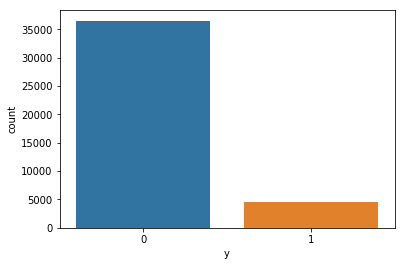

In [30]:
sns.countplot(Y)

# OH yes, We have  imbalanced class. 
# Solution:
-  SMOTE could be used to oversample 1's(or yes) in our dataset and then run our model
-  Test data will be untouched and will be checked for accuracy

## First, Split dataset into 80-10-10, i.e 80% training, 10% validation and 10% testing

In [31]:
Xtrain,Xtest_val,Ytrain,Ytest_val = train_test_split(X,Y, test_size=0.30, random_state=2)
Xtest,Xval,Ytest,Yval = train_test_split(Xtest_val,Ytest_val, test_size=0.50, random_state=2)

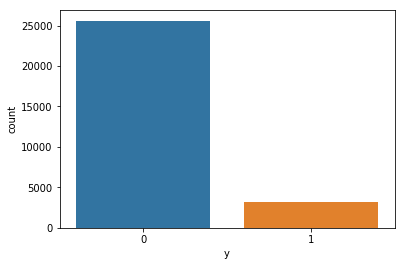

In [32]:
# Class before oversampling
sns.countplot(Ytrain)

## OverSample using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X__train,Y__train  = sm.fit_sample(Xtrain, Ytrain.ravel())

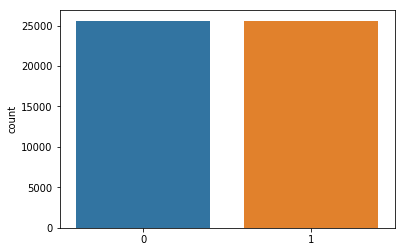

In [34]:
#After resampling
sns.countplot(Y__train)

### Perfect, let's carry on with our normalization now

In [35]:
print("Training dataset size",X__train.shape)
print("Testing dataset size",Xtest.shape)
print("Validation dataset size",Xval.shape)

Training dataset size (51188, 56)
Testing dataset size (6178, 56)
Validation dataset size (6179, 56)


### Awesome, we have splitted our dataset now. It's time to normalize it

## NORMALIZATION

In [36]:
scaler = MinMaxScaler()
scaler.fit(X__train)
X_train = scaler.transform(X__train)
X_test = scaler.transform(Xtest)
X_val = scaler.transform(Xval)

## Dataset is normalized with respect to training dataset. We now have ready data to be  fed in our machine learning model

# TRAINING MULTIPLE MODELS
### Let's train our dataset with different algorithms and check which performs the best. Let's follow the following pipeline:
-  LOGISTIC REGRESSION
-  RANDOM FOREST CLASSIFIER
-  Deep Neural Network with certain hidden states

# LOGISTIC REGRESSION

In [37]:
# Training a logistic regression model. lbfgs solver takes into consideration l2_penalty. Max_iter=5000
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=5000).fit(X_train, Y__train)

In [38]:
#Checking the accuracy of our model in test and validation dataset

In [39]:
test_accuracy = (clf.score(X_test,Ytest))*100

In [40]:
val_accuracy = (clf.score(X_val,Yval))*100

In [41]:
print("Test accuracy =",test_accuracy)
print("Validation accuracy =",val_accuracy)

Test accuracy = 85.99870508255098
Validation accuracy = 86.8425311539084


In [42]:
#Confusion Matrix for our model
Y_predt = clf.predict(X_test)
confusion_matrix(Ytest,Y_predt)

array([[4698,  773],
       [  92,  615]])

In [43]:
#Confusion Matrix for our model
Y_predv = clf.predict(X_val)
confusion_matrix(Yval,Y_predv)

array([[4743,  740],
       [  73,  623]])

/home/vikash/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


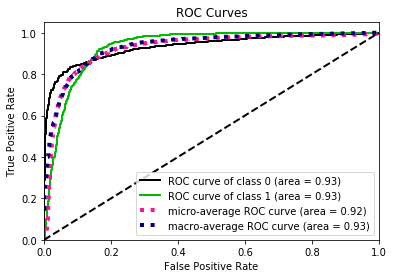

In [44]:
# ROC Curve
Y_probt = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(Ytest, Y_probt)
plt.show()

/home/vikash/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


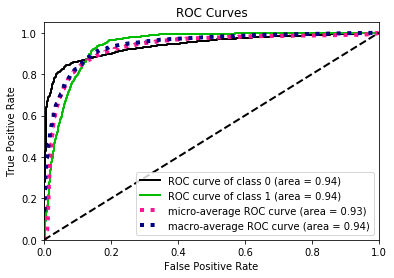

In [45]:
# ROC Curve
Y_probv = clf.predict_proba(X_val)
skplt.metrics.plot_roc_curve(Yval, Y_probv)
plt.show()

# Random Forest Classifier

In [46]:
clf = RandomForestClassifier(n_estimators=100,random_state=0).fit(X_train,Y__train)

In [47]:
clf.score(X_test,Ytest)

0.9100032372936225

## Thus, random forest classifier gives a really good accuracy of about 91%
To be noted: here max_depth wasn't specified so nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [48]:
# Confusion Matrix
Y_predt = clf.predict(X_test)
confusion_matrix(Ytest,Y_predt)

array([[5287,  184],
       [ 372,  335]])

# False negative reduced by a great factor compared to logistic regression. Thus obviously ranfom forest classifier works better than logistic regression

/home/vikash/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


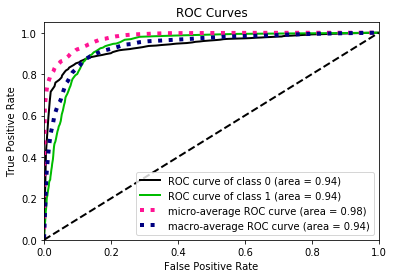

In [49]:
# Roc Curve
Y_probt = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(Ytest, Y_probt)
plt.show()

# Deep Learning using Keras library

## Now, we have seen two popular machine learning algorithms giving decent acuracy for out test and validation dataset. Let's see, just as experimentation, whether multineuron perceptron(deep learning) can increase the accuracy of our model

In [52]:
#training a deep model with shown architecture
model = Sequential()
model.add(Dense(32,activation = "relu",input_dim=56))

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01),activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

optimizerAdam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizerAdam , loss = "binary_crossentropy", metrics=["accuracy"])

In [55]:
history = model.fit(X_train, Y__train, batch_size = 100, epochs = 50, 
                       validation_data = (X_val, Yval), verbose = 2)

Train on 51188 samples, validate on 6179 samples
Epoch 1/50
 - 1s - loss: 0.1365 - acc: 0.9467 - val_loss: 0.2355 - val_acc: 0.8984
Epoch 2/50
 - 1s - loss: 0.1383 - acc: 0.9476 - val_loss: 0.2263 - val_acc: 0.9011
Epoch 3/50
 - 1s - loss: 0.1357 - acc: 0.9465 - val_loss: 0.2229 - val_acc: 0.9065
Epoch 4/50
 - 1s - loss: 0.1375 - acc: 0.9467 - val_loss: 0.2283 - val_acc: 0.9045
Epoch 5/50
 - 1s - loss: 0.1367 - acc: 0.9475 - val_loss: 0.2488 - val_acc: 0.8977
Epoch 6/50
 - 1s - loss: 0.1363 - acc: 0.9473 - val_loss: 0.2272 - val_acc: 0.9044
Epoch 7/50
 - 1s - loss: 0.1366 - acc: 0.9469 - val_loss: 0.2382 - val_acc: 0.9021
Epoch 8/50
 - 1s - loss: 0.1340 - acc: 0.9486 - val_loss: 0.2302 - val_acc: 0.9024
Epoch 9/50
 - 1s - loss: 0.1335 - acc: 0.9487 - val_loss: 0.2592 - val_acc: 0.8946
Epoch 10/50
 - 1s - loss: 0.1371 - acc: 0.9473 - val_loss: 0.2400 - val_acc: 0.9052
Epoch 11/50
 - 1s - loss: 0.1349 - acc: 0.9480 - val_loss: 0.2301 - val_acc: 0.9068
Epoch 12/50
 - 1s - loss: 0.1344 - a

# Model is trained. and we can observe that val_accuracy is close to 90%. That's pretty cool keeping in mind that we have just 2 hidden layers. Changing few hyperparameters will surely ensure increase in accuracy

### Let's see the performance of our model in test data set, which our model hasn't seen till now

In [56]:
#checking performance
model.evaluate(X_test,Ytest)

6178/6178 [==============================] - 0s 22us/step


[0.2548032405693657, 0.8952735513111039]

# Result : Test dataset gave 89.5% accuracy. Which is pretty good because of our small deep network

# Conclusion

## 1. How all these pre-processing and model training help in business model, which would help marketing team?

Answer : All insights were seen earlier in the notebook. Like how call duration effected a client, how his/her age was a factor, how default value, loan, etc. gave a meaningful insight about the project, etc.

Above three supervised model, effectively predicted whether a client will subscribe for a term deposit or not.
We can use this model to find the attribute with more weightage and concentrate on that part while campaigning.

Example: From insight call duration was a great influence for our output. A simple attribute which could be easily identified. But what about other attributes like month of contact, week_of_the day. Which weekday has more weightage, i.e, calling/contacting on which day will probably change a clien't mind and make his subscribe a term.
Or which month is better to start campaigning with full force, etc.

All these valuable information/analysis will be gained from this models. 

We can indivisually check weightage of each attribute and marketing team can use the insights for their benefit.

## 2. Which algorithm to use for this project?

Answer : 2 machine learning and 1 deep learning model is trained in this project.
Random forest classifier gives the maximum accuracy keeping in mind of the given hyperparameters. Maybe deep network will perform better than random forest with some hyperparameter training.

Deep Network has higher computation cost compared to machine learning models. If that's a factor, we can use random forest classifier which works really fine.

But if the accuracy is to be increased further, we can tune our deep network and hope for it to work better than other algorithms.

Logistic Regression is ok, but obviously can't compete random forest or deep network